Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
2st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 5** | **Line and Circle Detection**
**Name** | Catulay, Weslie Jee
**Section** | CPE32S3
**Date Performed**: | 02/19/25
**Date Submitted**: | 02/21/25
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

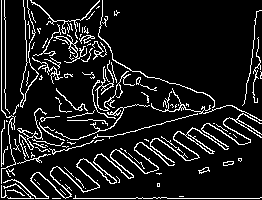

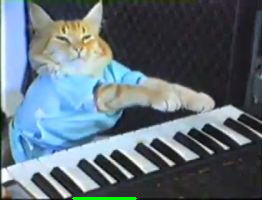

In [2]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?


This part of the code: `minLineLength = 20`



2. What is the mathematical formula for Hough transform and explain how it finds lines.

`ρ = x * cos(θ) + y * sin(θ)`

The first thing needs to its the edge detection by applying the edge of the image, next the parameter space calculating all possible lines and last for peak detection and line extraction its because converts the problem for finding the lines in the image to find a problem in parameter space.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

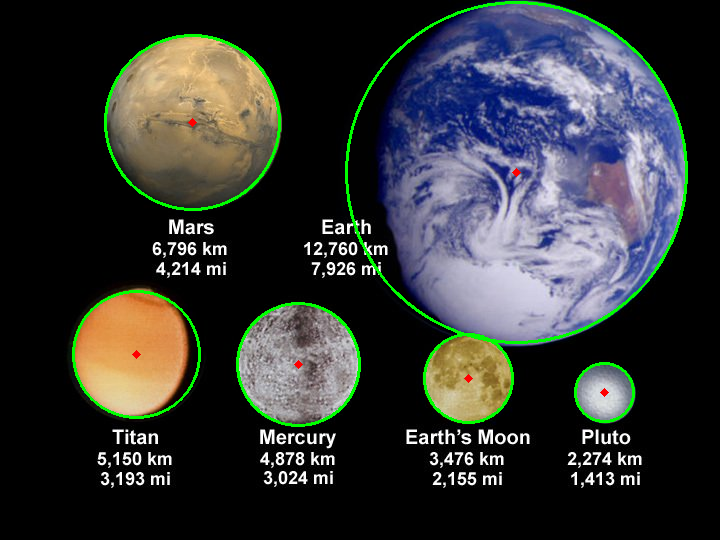

-1

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

`It will apply a medium blurry in this image with the size of 5x5 graysacle images.`

Change the value to 9, **what happens to the image**?

`It will applies a way stronger blurry image of the image and improves the circle detection.`

Lastly, change the value to 15, **what can you say about the resulting image?**

`It will give more stronger blur in the imgae it will make the circle detection clearer`

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

`Base on my analysis for this image the median blur has crucial role for pre-processing the image by reducing its noise in the image.`

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

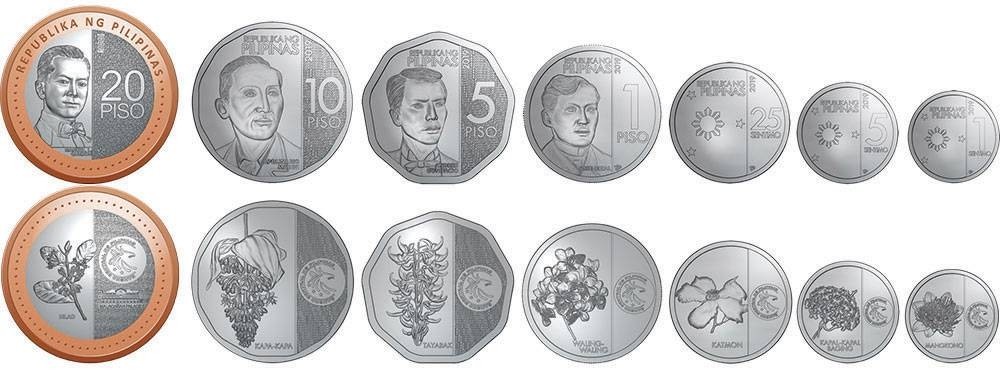

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

Total Coins Detected (Circles): 15


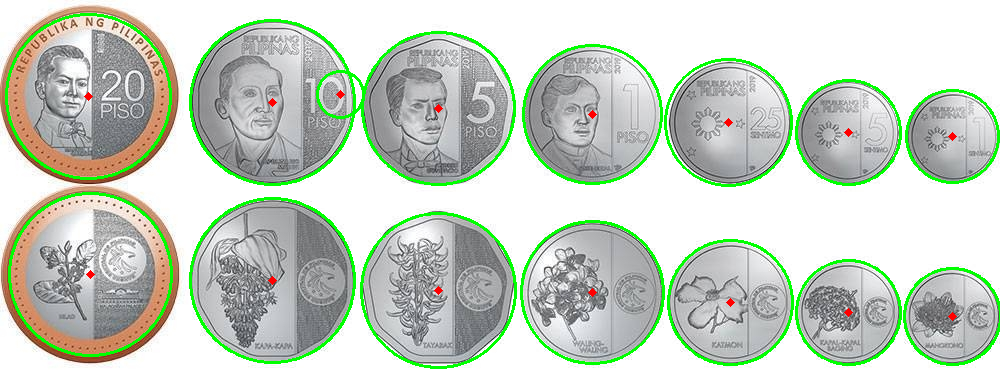

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_circles(img):

    img = cv2.imread('BSP-coin.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    blurred = cv2.GaussianBlur(gray, (15, 15), 0)


    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist=50,
                               param1=50, param2=30, minRadius=20, maxRadius=100)


    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
        print(f"Total Coins Detected (Circles): {len(circles[0])}")

    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

detect_circles("BSP-coin.jpg")

what is the output? Can you use houghlines to count circles?

- Primarily houghlines use to detect lines in the image specifically like that coin in the image provided you can see it detects the circling.

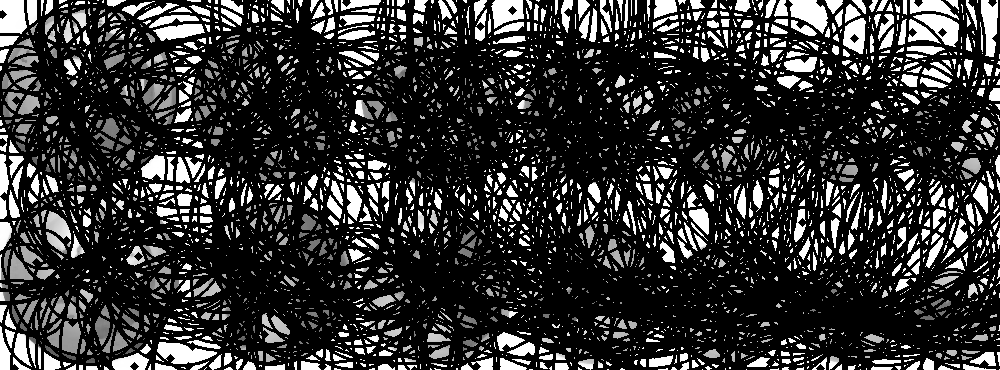

Number of circles detected: 494


In [10]:
import cv2
import numpy as np

def count_circles(image_path):

  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.medianBlur(img, 5)
  circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                            param1=50, param2=30, minRadius=0, maxRadius=0)
  if circles is not None:

    circles = np.round(circles[0, :]).astype("int")
    num_circles = len(circles)

    for (x, y, r) in circles:
      cv2.circle(img, (x, y), r, (0, 255, 0), 2)
      cv2.circle(img, (x, y), 2, (0, 0, 255), 3)

    cv2_imshow(img)


    return num_circles
  else:
    return 0


image_path = 'BSP-coin.jpg'
num_circles = count_circles(image_path)
print(f"Number of circles detected: {num_circles}")

Show the output? Can you use houghcircles to count the circles?

- yes in order to count the number of circles that will detect in the image.

## 5. Summary, Conclusions and Lessons Learned

This activity teach and give us knowledge how the detection and counting of circles in images using OpenCV's HoughCircles function works. This codes illustrated the steps of loading an image, reducing noise with a median blur, and then identifying circular shapes with HoughCircles. Drawing the identified circles on the original image and calculating the total number of circles discovered allowed for the visualization of the results. With this method, circular objects in tge image that can be automatically identified and analyzed.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*